# Probando OCR con Easy ocr

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os 

import warnings

warnings.filterwarnings('ignore')

import easyocr
from PIL import Image
import cv2

In [2]:
test_images_path = 'C:/Users/plane/OneDrive/Escritorio/COMPUTING SCIENCE/TFM_transformer_agents/proyecto_yolo/images/test/'
data_path = 'C:/Users/plane/OneDrive/Escritorio/COMPUTING SCIENCE/TFM_transformer_agents/data/signature_detection/'

df = pd.read_pickle(os.path.join(data_path, 'test_data.pickle'))
df.head()

,image_id,file_name,category_id,yolo_bbox,height,width
72,30,gsa_LAK07264-Lease_Z-03.png,1,"[0.426025390625, 0.9334621697397829, 0.0594830...",4400.0,3400.0
73,30,gsa_LAK07264-Lease_Z-03.png,1,"[0.5895389784250827, 0.9406679038952745, 0.083...",4400.0,3400.0
74,31,nist_r0293_01.png,0,"[0.29539207707966053, 0.8274622648426493, 0.29...",3300.0,2560.0
75,31,nist_r0293_01.png,0,"[0.30774805534399297, 0.847579108344184, 0.266...",3300.0,2560.0
79,33,nist_r0831_01.png,0,"[0.26960535891585247, 0.815774988245081, 0.233...",3300.0,2560.0


In [3]:
documents = list(df['file_name'].unique())
print(len(documents))
print(documents[:10])

553
['gsa_LAK07264-Lease_Z-03.png', 'nist_r0293_01.png', 'nist_r0831_01.png', 'gsa_LAL45056-SLA-13-1_Z-01.png', 'nist_r0413_01.png', 'gsa_LAL45056-SLA-16-_Z-01.png', 'gsa_LAK07249-Lease-a_Z-03.png', 'gsa_LAL45056-SLA-39-_Z-01.png', 'lfw39d00.png', 'nist_r0130_01.png']


In [4]:
from random import choice, shuffle

In [5]:
# shuffle(documents)

# print(documents[:10])

# nist_docus= [ docu for docu in documents if 'nist' in docu]
# print(len(nist_docus))
# nist_docus[:10]
        

In [6]:
docu = choice(documents)

documents.remove(docu)

print(len(documents))

552


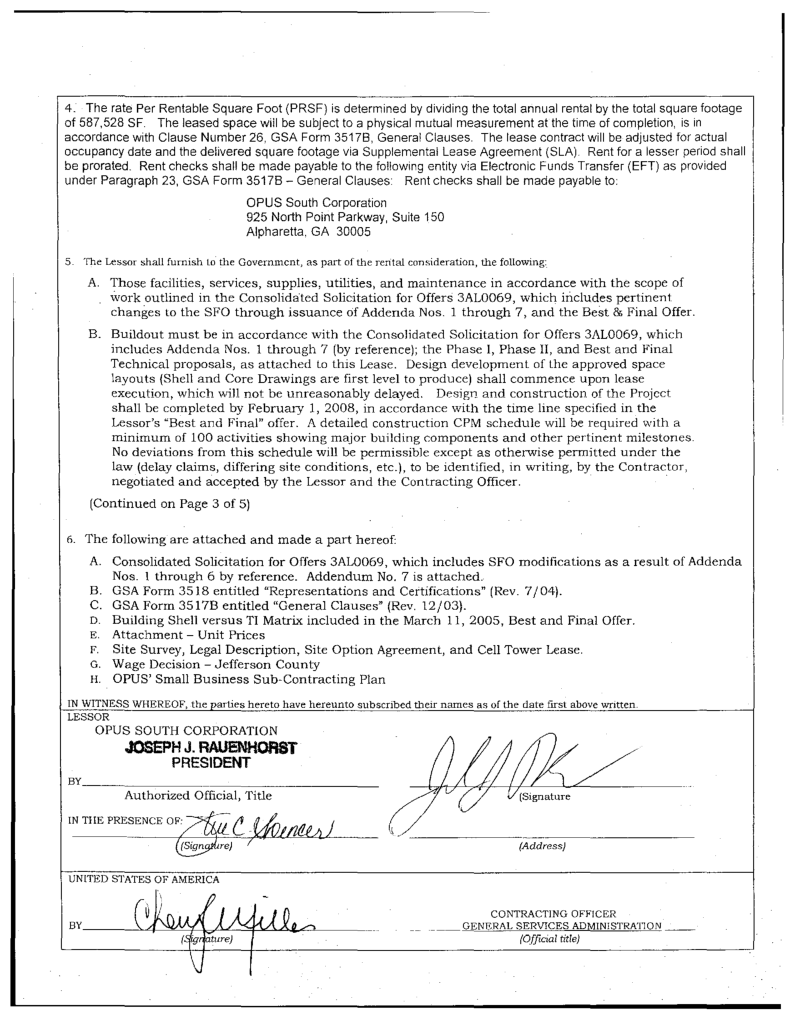

In [7]:
#img = documents[4]
img_path = os.path.join(test_images_path, docu)

def show_document(docu_path):
    imagen = cv2.imread(docu_path, cv2.IMREAD_GRAYSCALE)  # Cargar directamente en escala de grises
    plt.figure(figsize=(10, 13))
    plt.imshow(imagen, cmap='gray')  # Asegurarse de usar el mapa de colores 'gray'
    plt.axis('off')  # Desactiva los ejes
    plt.show()
    
show_document(img_path)

In [8]:
# Crea el objeto lector para el idioma inglés.
imagen =  cv2.imread(img_path)

# Convertir la imagen a escala de grises, si es necesario
img_cv_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
reader = easyocr.Reader(['en'])
results = reader.readtext(img_cv_gray)

# Imprime los resultados.
for (bbox, text, prob) in results:
    print(f"Texto detectado: {text}, confianza: {prob:.2f}")

Texto detectado: 4 ., confianza: 0.37
Texto detectado: The rate Per Rentable Square Foot (PRSF_, confianza: 0.72
Texto detectado: is determined by dividing the total annual rental by the total square footage, confianza: 0.80
Texto detectado: of 587,528 SF., confianza: 0.94
Texto detectado: The leased space will be subject to a physical mutual measurement at the time of completion, is in, confianza: 0.75
Texto detectado: accordance with Clause Number 26, GSA Form 3517B, General Clauses., confianza: 0.90
Texto detectado: The lease contract will be adjusted for actual, confianza: 0.76
Texto detectado: occupancy date and the delivered square footage via Supplemental Lease Agreement (SLA):, confianza: 0.93
Texto detectado: Rent for a lesser period shall, confianza: 0.80
Texto detectado: be prorated., confianza: 0.51
Texto detectado: Rent checks shall be made payable to the following entity via Electronic Funds Transfer (EFT) as provided, confianza: 0.81
Texto detectado: under Paragraph 23, 

In [9]:
# for data in results[:10]: 
#     print(data[1])

In [10]:
text_from_img = ' '.join([detected_text[1] for detected_text in results])

print(text_from_img)

4 . The rate Per Rentable Square Foot (PRSF_ is determined by dividing the total annual rental by the total square footage of 587,528 SF. The leased space will be subject to a physical mutual measurement at the time of completion, is in accordance with Clause Number 26, GSA Form 3517B, General Clauses. The lease contract will be adjusted for actual occupancy date and the delivered square footage via Supplemental Lease Agreement (SLA): Rent for a lesser period shall be prorated. Rent checks shall be made payable to the following entity via Electronic Funds Transfer (EFT) as provided under Paragraph 23, GSA Form 3517B L General Clauses: Rent checks shall be made payable to: OPUS South Corporation 925 North Point Parkway , Suite 150 Alpharetta, GA 30005 5_ The Lessor shall furnish L0' the Governicnt; &s of the rental consideration, the following: A. Those facilities, services, supplies, utilities, and maintenance in accordance with the scope of work outlined in the Consolidated Solicitati

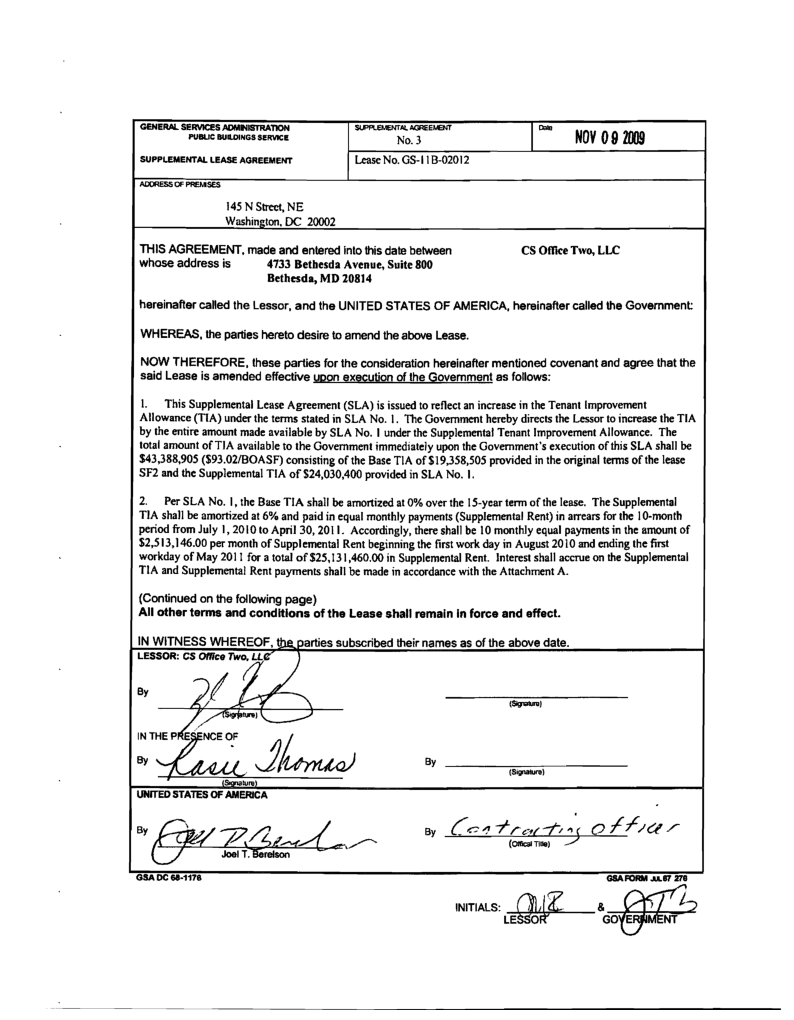

In [30]:
img_01 = documents[7]#choice(documents)
documents.remove(img_01)
img_01_path = os.path.join(test_images_path, img_01)
show_document(img_01_path)

In [20]:
def image_to_text(img_path): 
    
    imagen =  cv2.imread(img_path)
    img_cv_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

    # Crea el objeto lector para el idioma inglés.
    reader = easyocr.Reader(['en'])

    text_in_image = reader.readtext(img_cv_gray)
    text_from_img = ' '.join([detected_text[1] for detected_text in text_in_image])
    return text_from_img

my_text = image_to_text(img_01_path)
print(my_text)

GENERAL SERVICES ADMINISTRATION SpPPLENENTAL AGREENEITT' DATE PUBLIC BUILDINGS SERVICE NO . 13 11/19/2007 SUPPLEMENTAL LEASE AGREEMENT To ZEASE No GS-048-45056 ADDRESS OF PREMISES 8Eh Avenue { 14*7 Street Birmingham, AL THIS AGREEMENT made and entered into this and between: 8th & 14th L.L.C . (the Lessor) Whose address 19: 4200 West Cypress Street Suite 444 Tampa , FL 33607-4168 Hereinafter called the Lessor and the ONITED STATES OF AMERICA hereinafter called the Government WHEREAS ., the parties hereto desire LO amend the above lease (the Lease} NOW THEREFORE these parties the considerations hereinafter mentioned covenant and agree that the said Lease 18 amended, 13 Eollows This Supplemental Lease Agreemnent (SLA) No 13 docurents the Tenant Improvement Allowancc (TIA) settlement [or the Lease in the amount of $29,903,070.00 (the Amount): The Settlement Amount is based on the original 100% construction drawing documents dated Jaedle22/n33 and spccifically excludes the following: (1) ch

# probando YOLO en el documento

In [31]:
from ultralytics import YOLO

In [32]:
path_to_yolo ="C:/Users/plane/OneDrive/Escritorio/COMPUTING SCIENCE/TFM_transformer_agents/runs\detect/train\weights/best.pt"

model = YOLO(path_to_yolo)

img_detections = model.predict(
    source=img_01_path)


image 1/1 C:\Users\plane\OneDrive\Escritorio\COMPUTING SCIENCE\TFM_transformer_agents\proyecto_yolo\images\test\gsa_(R)LDC02012-SLA-3-01.png: 640x512 3 signatures, 3 initialss, 66.4ms
Speed: 0.0ms preprocess, 66.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


In [33]:
# print(img_detections)

In [34]:
img_detections[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0., 0., 1., 1., 1.], device='cuda:0')
conf: tensor([0.8102, 0.7930, 0.7814, 0.7574, 0.6034, 0.4010], device='cuda:0')
data: tensor([[7.0516e+02, 2.7775e+03, 1.3614e+03, 3.1611e+03, 8.1023e-01, 0.0000e+00],
        [6.2862e+02, 3.1646e+03, 1.5426e+03, 3.4134e+03, 7.9298e-01, 0.0000e+00],
        [5.6613e+02, 3.5185e+03, 1.6038e+03, 3.7649e+03, 7.8140e-01, 0.0000e+00],
        [2.1966e+03, 3.8476e+03, 2.4544e+03, 4.0288e+03, 7.5745e-01, 1.0000e+00],
        [2.6551e+03, 3.8121e+03, 3.0223e+03, 4.0786e+03, 6.0344e-01, 1.0000e+00],
        [2.7915e+03, 3.8270e+03, 3.0300e+03, 4.0736e+03, 4.0101e-01, 1.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (4394, 3400)
shape: torch.Size([6, 6])
xywh: tensor([[1033.2909, 2969.3403,  656.2520,  383.6106],
        [1085.5833, 3288.9917,  913.9357,  248.7815],
        [1084.9832, 3641.7046, 1037.7063,  246.4319],
        [2325.4829, 3938.1748,  257.8281,  181.

# Extraer información de las prediccioines

In [42]:
boxes = img_detections[0].boxes
predicted_clases = boxes.cls.tolist()
class_names = img_detections[0].names
predicted_conf = boxes.conf.tolist()
boxes_ubications = boxes.xywh.tolist()
img_shape = boxes.orig_shape


print(predicted_clases)
print(class_names)
print(predicted_conf)
print(boxes_ubications)
print(img_shape)

img_detections[0].show()

[0.0, 0.0, 0.0, 1.0, 1.0, 1.0]
{0: 'signature', 1: 'initials', 2: 'redaction', 3: 'date'}
[0.8102256655693054, 0.7929794788360596, 0.7814007997512817, 0.7574478387832642, 0.6034449338912964, 0.40100839734077454]
[[1033.2908935546875, 2969.34033203125, 656.2520141601562, 383.610595703125], [1085.583251953125, 3288.99169921875, 913.9356689453125, 248.781494140625], [1084.983154296875, 3641.70458984375, 1037.706298828125, 246.431884765625], [2325.48291015625, 3938.1748046875, 257.828125, 181.206787109375], [2838.6962890625, 3945.3203125, 367.114013671875, 266.461181640625], [2910.71337890625, 3950.332763671875, 238.49169921875, 246.5859375]]
(4394, 3400)


## mapear las predicciones a los nombres de las clases

In [36]:
predicted_class_w_names = [class_names[int(pred)] for pred in predicted_clases]
predicted_class_w_names

['signature', 'signature', 'signature', 'initials', 'initials', 'initials']

## Extraer el x centro y el y centro 

In [37]:
boxes_xy_loc = [location[:2] for location in boxes_ubications]
boxes_xy_loc

[[1033.2908935546875, 2969.34033203125],
 [1085.583251953125, 3288.99169921875],
 [1084.983154296875, 3641.70458984375],
 [2325.48291015625, 3938.1748046875],
 [2838.6962890625, 3945.3203125],
 [2910.71337890625, 3950.332763671875]]

## creando un diccionario con la info de inferencia

In [38]:
import json

In [39]:
predictions_dict = {
    'objetos_detectados': predicted_class_w_names, 
    'confianza': predicted_conf, 
    'ubicación_xy': boxes_xy_loc
}

print(json.dumps(predictions_dict))

pred_df = pd.DataFrame(predictions_dict)

display(pred_df)

{"objetos_detectados": ["signature", "signature", "signature", "initials", "initials", "initials"], "confianza": [0.8102256655693054, 0.7929794788360596, 0.7814007997512817, 0.7574478387832642, 0.6034449338912964, 0.40100839734077454], "ubicaci\u00f3n_xy": [[1033.2908935546875, 2969.34033203125], [1085.583251953125, 3288.99169921875], [1084.983154296875, 3641.70458984375], [2325.48291015625, 3938.1748046875], [2838.6962890625, 3945.3203125], [2910.71337890625, 3950.332763671875]]}


,objetos_detectados,confianza,ubicación_xy
0,signature,0.810226,"[1033.2908935546875, 2969.34033203125]"
1,signature,0.792979,"[1085.583251953125, 3288.99169921875]"
2,signature,0.781401,"[1084.983154296875, 3641.70458984375]"
3,initials,0.757448,"[2325.48291015625, 3938.1748046875]"
4,initials,0.603445,"[2838.6962890625, 3945.3203125]"
5,initials,0.401008,"[2910.71337890625, 3950.332763671875]"


In [43]:
print(pred_df.to_markdown())

predictions_dict

|    | objetos_detectados   |   confianza | ubicación_xy                           |
|---:|:---------------------|------------:|:---------------------------------------|
|  0 | signature            |    0.810226 | [1033.2908935546875, 2969.34033203125] |
|  1 | signature            |    0.792979 | [1085.583251953125, 3288.99169921875]  |
|  2 | signature            |    0.781401 | [1084.983154296875, 3641.70458984375]  |
|  3 | initials             |    0.757448 | [2325.48291015625, 3938.1748046875]    |
|  4 | initials             |    0.603445 | [2838.6962890625, 3945.3203125]        |
|  5 | initials             |    0.401008 | [2910.71337890625, 3950.332763671875]  |


{'objetos_detectados': ['signature',
  'signature',
  'signature',
  'initials',
  'initials',
  'initials'],
 'confianza': [0.8102256655693054,
  0.7929794788360596,
  0.7814007997512817,
  0.7574478387832642,
  0.6034449338912964,
  0.40100839734077454],
 'ubicación_xy': [[1033.2908935546875, 2969.34033203125],
  [1085.583251953125, 3288.99169921875],
  [1084.983154296875, 3641.70458984375],
  [2325.48291015625, 3938.1748046875],
  [2838.6962890625, 3945.3203125],
  [2910.71337890625, 3950.332763671875]]}

# enviar a un LLM la info

In [44]:
import openai 
from dotenv import load_dotenv
from open_ai_utils import enviar_promt_chat_completions_mode

# Cargar variables de entorno desde .env
load_dotenv()

# Acceder a la API key
api_key = os.getenv("API_KEY")
openai.api_key = api_key

In [45]:
user = '¿de qué trata el documento?'
prompt = [
{'role': 'system', 
        'content': f'Eres un asistente que combina por un lado, OCR para extraer texto de documentos de una sola pagina en imágenes,\
                     y por otro lado, detecciones de firmas, iniciales, redacciones y fechas escritas a mano, y detectadas mediante\
                     el modelo YOLO. Tu objetivo es dar una idea básica o una descripción breve de lo que es el documento en base al texto extraido \
                     meidante OCR, y debes informar al usuario de cuantas y cuales instancias a predicho YOLO en la imagen, y la  \
                     ubicación aproximada de esas predicciones, pero no expongas las coordenadas de las detecciones explicitamente.\
                     Para ello, el usuario te proporcionará el texto extraido de la imagen que esta en ingles, pero tu debes informar al usuario en castellano\
                     , y se te proporciona un dataframe con la info de las predicciones'}, 
                            
{'role': 'user', 
        'content': f'En base al siguiente texto extraido meidante OCR:\n{my_text}\n, y los resultados hechos por YOLO:\n{pred_df.to_markdown()}\n\
                     teniendo en cuenta que la imagen es de tamaño {img_shape}, responde a mi consulta:{user}'},

{'role': 'assistant', 
        'content': 'Descripción de doumento:\n\n\
                    AQUI HABLAS DEL TEXTO EXTRAIDO POR OCR\n\n\
                    información especial detectada:\n\n\
                    AQUI DAS UNA DESCRIPCIÓN DE LAS PREDICCIONES QUE HA HECHO EL MODELO DE DETECCIÓN. por ejemplo:\
                    - 2 firmas (signatures) con niveles de confianza 91.3% y 77.6%, una ubicada arriba a la derecha de la imagen y las otra en la esquina inferior\n\
                    - 2 redacciones (redactions) con niveles de confianza de 76.8% y 75.8%, ubicadas en la parte central de la imagen.\n\
                    - 1 inicial con nivel de confianza de 30.4%, ubicada arriba a la derecha\n\
                    \ ERES libre de darle más variabilidad al informe'}
        ]

# simular_respuesta_generativa(f'El numero total de tokens de tu prompt es: {num_tokens_from_messages(primer_prompt)}, \n\n')

respuesta = enviar_promt_chat_completions_mode(
                mensaje= prompt, 
                modelo="gpt-4-1106-preview", # gpt-3.5-turbo-0125
                maximo_tokens=2000,  
                aleatoriedad=0.5, 
                probabilidad_acumulada=0.75)

In [46]:
print(respuesta)

El documento parece ser un Acuerdo de Arrendamiento Suplementario (Supplemental Lease Agreement) entre la Administración de Servicios Generales (General Services Administration) de los Estados Unidos y la entidad 8th & 14th L.L.C. Este acuerdo, identificado como SLA No. 13 y fechado el 19 de noviembre de 2007, modifica un contrato de arrendamiento existente para una propiedad ubicada en la 8th Avenue y 14th Street en Birmingham, Alabama. El documento detalla un acuerdo financiero relacionado con la mejora de inquilinos y establece un monto de liquidación de $29,903,070.00, excluyendo ciertos órdenes de cambio y gastos operativos incrementados. También menciona pagos progresivos realizados y pendientes por parte de la GSA al arrendador. El documento termina con las firmas de las partes involucradas y las condiciones del contrato de arrendamiento original se mantienen en vigor.

Información especial detectada:

- Tres instancias de firmas han sido detectadas con niveles de confianza alto

# probando la clase LLMsToOCR

Esta clase tiene todo lo visto hasta ahora pero en enfoque OOP

In [47]:
from LLMsToOCR import LLMsToOCR

In [48]:
agent = LLMsToOCR()

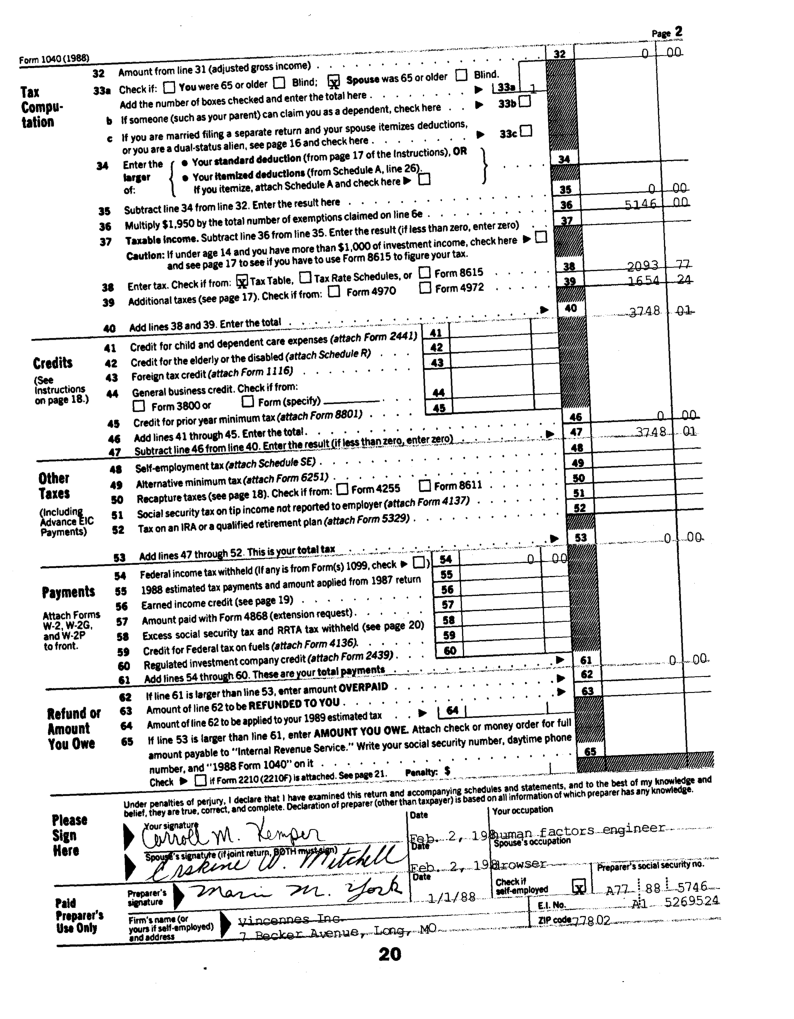

In [49]:
agent.choose_document()
agent.show_document()

In [50]:
text = agent.extract_text_from_docu()
predicitons = agent.signature_detection()


image 1/1 C:\Users\plane\OneDrive\Escritorio\COMPUTING SCIENCE\TFM_transformer_agents\proyecto_yolo\images\test\nist_r0643_01.png: 640x512 3 signatures, 35.0ms
Speed: 4.0ms preprocess, 35.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


In [78]:
# l = ['a', 'b', 'c']

# def remove_element(lista): 
#     elem = choice(lista)
#     lista.remove(elem)
#     return elem

# print(remove_element(l))
# print(l)